# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [1]:
import pylab 
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv')

In [3]:
data0 = titanic.copy()

In [4]:
data0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f'Percentage of data without missing values: {data0.dropna().shape[0]/ np.float(data0.shape[0])}')

Percentage of data without missing values: 0.2053872053872054


In [6]:
data1 = titanic.copy()

In [7]:
data1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

<AxesSubplot:xlabel='Age', ylabel='Count'>

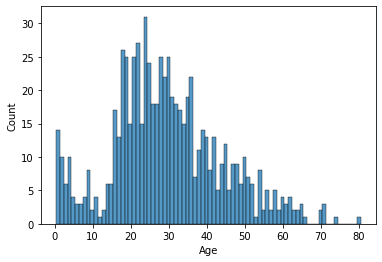

In [19]:
sns.histplot(data= data1, x= 'Age', binwidth=1)


**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [22]:
median = data1['Age'].median()
mean = data1['Age'].mean()
print(median, mean)

28.0 29.69911764705882


---
## 2. Feature Normalization

In [28]:
data2 = titanic.copy()
median = data2.Age.median()
data2['Age'] = data2['Age'].fillna(median)
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

In [24]:
# In order to normalize data with values between 0 and 1. So all variables are in same scale.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalerMinMax = MinMaxScaler()
scalerMinMax.fit(data2[['Age']]) # Puede ser también data['Age'].values.reshape(-1,1)

MinMaxScaler()

In [29]:
# Now that data has been fitted (calculated all relevant variables for further processing), it can be scaled.
data2['Age'] = scalerMinMax.transform(data2[['Age']])
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,30.0000,C148,C


---
## 3. Categorical Encoding

### One-Hot Encoding

In [76]:
data3 = titanic.copy()

In [77]:
data3['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [78]:
data3_oh = pd.get_dummies(data3['Sex'])
data3_oh.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [79]:
data3 = data3.join(data3_oh)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

In [80]:
data3 = data3.drop(['male', 'Sex'], axis= 1)
data3['Embarked'].isna().sum() # There are only 2 Nan. Due to the size of the dataset, we will drop them directly.
data3.dropna(subset='Embarked')
data3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [81]:
data3 = pd.get_dummies(data3, columns=['Embarked']) # This way same process is done in one line of code. Original columns are dropped, and new ones are joined.
data3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,1


**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

---
## 4 Transformations

In [13]:
data4 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [15]:
data4['Age_log'] = np.log(data4.Age)

**TODO:** Convert Age to months

---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

**TODO:** Plot histograms on __Age__ and __Fare__

**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [16]:
data7 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/stock_prices.csv')
data7.head()

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

**TODO:** Extract Month from Date

**TODO:** Convert Day to numeric from 1-31

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year 

**TODO:** Extract hour